<a href="https://colab.research.google.com/github/WajeehaHashmi27/Match-Result-Prediction-Model/blob/main/Match_Result_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

path='/content/drive/MyDrive/Dataset.csv'

In [ ]:
df = pd.read_csv(path)
if df.isnull().values.any():
    df = df.dropna()
    print("Missing values removed. Dataset is updated.")
else:
    print("No missing values.")

print(df)

output_file_path = "/content/drive/MyDrive/updated-data.csv"
df.to_csv(output_file_path, index=False)
print("Cleaned dataset saved to {output_file_path}.")

Missing values removed. Dataset is updated.
     Unnamed: 0        Date      Team      Opponent  \
0             1  28/08/2006  Pakistan       England   
1             2    2/2/2007  Pakistan  South Africa   
2             3    2/9/2007  Pakistan    Bangladesh   
3             4    4/9/2007  Pakistan         Kenya   
4             5   12/9/2007  Pakistan      Scotland   
..          ...         ...       ...           ...   
197         198  22/09/2022  Pakistan       England   
198         199  23/09/2022  Pakistan       England   
199         200  25/09/2022  Pakistan       England   
200         201  28/09/2022  Pakistan       England   
201         202  30/09/2022  Pakistan       England   

                         Ground Result  
0       County Ground (Bristol)    YES  
1             Wanderers Stadium     NO  
2          Gymkhana Club Ground    YES  
3          Gymkhana Club Ground    YES  
4                     Kingsmead    YES  
..                          ...    ...  
197  Nat

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/updated-data.csv")

df = df.drop("Date", axis=1)

df.to_csv("/content/drive/MyDrive/updated-data.csv", index=False)
print("Date column dropped")

Date column dropped


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/updated-data.csv")

duplicate_rows = df.duplicated()
# Print the duplicate rows
print("Duplicate rows:")
print(df[duplicate_rows])
# Remove duplicate rows
df.drop_duplicates(inplace=True)

df.to_csv("/content/drive/MyDrive/updated-data.csv", index=False)

print("Duplicate rows removed")

Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, Team, Opponent, Ground, Result]
Index: []
Duplicate rows removed


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/updated-data.csv")

# Standardize column values
df["Team"] = df["Team"].str.lower().str.strip()
df["Opponent"] = df["Opponent"].str.lower().str.strip()
df["Ground"] = df["Ground"].str.lower().str.strip()
df["Result"] = df["Result"].str.lower().str.strip()


df.to_csv("/content/drive/MyDrive/updated-data.csv", index=False)

print("Updated CSV file saved successfully.")

Updated CSV file saved successfully.


In [ ]:

# Create a dataframe with the given data
data = {
    'Unnamed: 0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Team': ['pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan', 'pakistan'],
    'Opponent': ['england', 'south africa', 'bangladesh', 'kenya', 'scotland', 'india', 'sri lanka', 'australia', 'bangladesh', 'new zealand', 'india', 'bangladesh', 'canada', 'sri lanka', 'zimbabwe', 'sri lanka'],
    'Ground': ['county ground (bristol)', 'wanderers stadium', 'gymkhana club ground', 'gymkhana club ground', 'kingsmead', 'kingsmead', 'wanderers stadium', 'wanderers stadium', 'newlands', 'newlands', 'wanderers stadium', 'national stadium (karachi)', 'maple leaf north - west ground', 'maple leaf north - west ground', 'maple leaf north - west ground', 'maple leaf north - west ground'],
    'Result': ['yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Specify the categorical columns
categorical_columns = ["Team", "Opponent", "Ground"]

# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded data
print(df_encoded)
print("Encoding completed successfully.")


    Unnamed: 0 Result  Team_pakistan  Opponent_australia  Opponent_bangladesh  \
0            1    yes              1                   0                    0   
1            2     no              1                   0                    0   
2            3    yes              1                   0                    1   
3            4    yes              1                   0                    0   
4            5    yes              1                   0                    0   
5            6     no              1                   0                    0   
6            7    yes              1                   0                    0   
7            8    yes              1                   1                    0   
8            9    yes              1                   0                    1   
9           10    yes              1                   0                    0   
10          11     no              1                   0                    0   
11          12    yes       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df = shuffle(df)

df_encoded = pd.get_dummies(df, columns=categorical_columns)


X = df_encoded.drop('Result', axis=1)
y = df_encoded['Result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_predictions)

print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df = shuffle(df)


df_encoded = pd.get_dummies(df, columns=categorical_columns)


X = df_encoded.drop('Result', axis=1)
y = df_encoded['Result']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:

nb_predictions = nb_classifier.predict(X_test)


nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.75


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df = shuffle(df)

df_encoded = pd.get_dummies(df, columns=categorical_columns)

X = df_encoded.drop('Result', axis=1)
y = df_encoded['Result']

NameError: ignored

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
tree = dt_classifier.tree_

# Accessing the root node properties
root_node = tree.nodes[0]
feature_index = root_node.feature
threshold = root_node.threshold
left_child = root_node.left_child
right_child = root_node.right_child

# Printing root node properties
print("Feature index of the root node:", feature_index)
print("Threshold value of the root node:", threshold)
print("Index of the left child node:", left_child)
print("Index of the right child node:", right_child)

NameError: ignored

In [ ]:

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df = shuffle(df)

df_encoded = pd.get_dummies(df, columns=categorical_columns)

X = df_encoded.drop('Result', axis=1)
y = df_encoded['Result']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.5


In [ ]:
import matplotlib.pyplot as plt

naive_bayes_predictions = nb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
decision_tree_predictions = dt_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

In [ ]:
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
labels = ['Naive Bayes', 'KNN', 'Decision Tree', 'SVM']
accuracies = [naive_bayes_accuracy, knn_accuracy, decision_tree_accuracy, svm_accuracy]

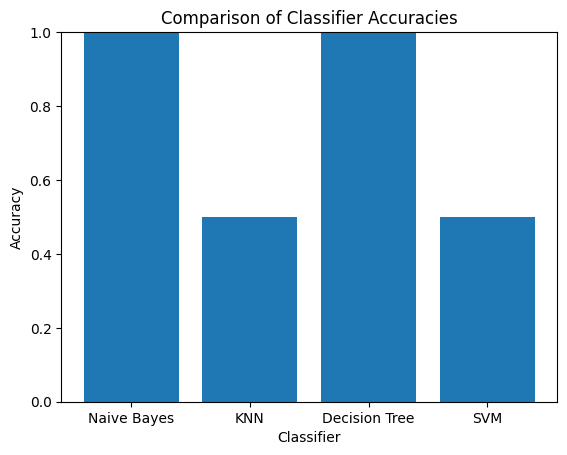

In [ ]:
plt.bar(labels, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

In [ ]:
import pandas as pd

incoming_data = {
    'Unnamed: 0': [1],
    'Team': ['pakistan'],
    'Opponent': ['australia'],
    'Ground': ['county ground (bristol)']
}

df_incoming = pd.DataFrame(incoming_data)

df_incoming_encoded = pd.get_dummies(df_incoming, columns=categorical_columns)

df_incoming_aligned = df_incoming_encoded.reindex(columns=X.columns, fill_value=0)

prediction = dt_classifier.predict(df_incoming_aligned)

# Print the predicted label
print(prediction)

['yes']


In [ ]:
import pandas as pd

incoming_data = {
    'Unnamed: 0': [1],
    'Team': ['pakistan'],
    'Opponent': ['india'],
    'Ground': ['county ground (bristol)']
}

df_incoming = pd.DataFrame(incoming_data)

df_incoming_encoded = pd.get_dummies(df_incoming, columns=categorical_columns)

df_incoming_aligned = df_incoming_encoded.reindex(columns=X.columns, fill_value=0)

prediction = dt_classifier.predict(df_incoming_aligned)

# Print the predicted label
print(prediction)

['no']
